---

We have seen how to use a depth-first search to find a path between vertices. If we instead use a breadth-first search, then the first path we find from $u$ to $v$ will be the shortest path, since breadth-first search always considers shortest paths earlier than longer ones.

We will modify the iterative breadth-first traversal from the *Traversal and Search* notebook in the following ways:

1. Start with an *ancestor list* `ancestor`, a list of length `len(G)`; initially set each entry to be `None`, apart from `ancestor[u] = -1`.
2. Instead of checking whether a vertex has already been visited when you pop it from the queue, instead only add a vertex to the queue if it does not yet have an assigned ancestor (i.e. if `ancestor[v] is None`).
3. Suppose your current vertex is $x$, and you are adding the vertex $y$ to the queue. Then set `ancestor[y]` to be `x`.
4. If you find $v$ in the queue, trace back from $v$ to obtain a path from $v$ to $u$; return the reverse of theis path as your path from $u$ to $v$.

For modification number 4: once you reach your "target" vertex $v$ during the breadth-first search, you can trace back the path you took to reach it using the list `ancestor`. In particular, you can get the path $v = w_0, w_1, w_2, w_3, \ldots, w_i = u$, where $w_{k+1}$ is the ancestor of $w_k$ for all $0 \leq k < i$. Then you need to reverse this path.


Implement this modified breadth-first traversal as a function `shortest_path`. The input should be a graph $G$ and two vertices $u, v \in G$, and the output should be a list representing the shortest path from $u$ to $v$, or `None` if there is no such path. As usual, assume that the vertices of $G$ are $\{0, 1, \ldots, n - 1\}$.

[2, 10, 7, 6]

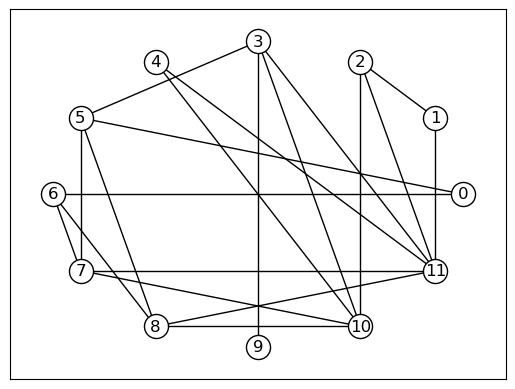

In [3]:
# YOUR CODE HERE

from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_graph6_bytes(b'KGAS?KEC@rNK')

nx.draw_networkx(G,
                 pos=nx.circular_layout(G),
                 node_color="w",
                 edgecolors="k")

def shortest_path(G, u, v):
    
    vertices = list(G.nodes())
    
    #creating the ancestor list
    
    ancestor = [None]*len(G)
    ancestor[u] = -1
    
    #creating the queue
    
    queue = deque()
    queue.append(u)
    
    #setting the path to be None
    
    path = None
    
    # While there are still things in the queue
    
    while queue:
        
        #assign ancestors for all vertices
        
        current_vertex = queue.popleft()
        
        for i in vertices:
            
            if G.has_edge(current_vertex,i) and ancestor[i] == None:
                
                queue.append(i)
                ancestor[i] = current_vertex
            
            #if v is found, create a path from v to u using the ancestor list
            
                if i == v:
                    path = []
                    path.append(v)
                    while path[-1] != u:
                        path.append(ancestor[path[-1]])
                        
                    #return the reversed path
                    
                    return path[::-1]
        
    return(path)

shortest_path(G,2,6)



The *distance* between two vertices is the length of the shortest path between them ($\infty$ if there is none); recall that the length of a path is equal to the number of vertices it contains minus one. The *diameter* of a graph is the largest distance between two vertices. There are polynomial-time algorithms for finding the diameter of a graph. If the graph is a *tree* $T$, then there is a particularly efficient method:
    
1. Start a normal breadth-first traversal from *any* vertex $u$. Return the last vertex $v$ in the queue which had not previously been seen. That is, the last *unseen* vertex which you pop from the queue.
2. Do the same thing, but starting at $v$, to obtain a vertex $w$.
3. The diameter of $T$ is the distance from $v$ to $w$, which you can obtain using `shortest_path`.
    
Write a function `tree_diameter` which takes a tree $T$ and uses the method above to return the diameter of $T$.
      
If you want to test your code on more trees, you can access many at the [House of Graphs](https://houseofgraphs.org/search); set "*Require a specific (numeric) value for an invariant*" to "*Number of components equal to 1*" and "*Only consider certain classes of graphs*" to "*Acyclic*". You can get the *Graph6* encoding of the graph, open it in a text editor like Notepad or TextEdit, and use it as shown in the validation cell; note that it is `from_graph6_bytes(b"...")`.

9

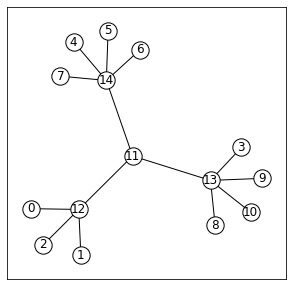

In [3]:
# YOUR CODE HERE

T = nx.from_graph6_bytes(b"N???????????w@CN@w_")
fig, ax = plt.subplots(figsize=(5, 5))

nx.draw_networkx(T,
                 ax=ax,
                 node_color="w",
                 edgecolors="k")

def tree_diameter(T):
    
    #setting the starting vertex
    
    vertices = list(T.nodes())
    u = vertices[0]
    
    #creating a function to perform the traversal, similar to lecture
    
    def traversal(u):
        
        queue = deque()
        queue.append(u)
        seen = set()
        
        while queue:
            
            current_vertex = queue.popleft()
            
            if current_vertex not in seen:
                last_unseen = current_vertex
                seen.add(current_vertex)
                queue.extend(T[current_vertex])
                
        #returning the last unseen vertex      
        
        return last_unseen
    
    #setting v and w
    
    v = traversal(u)
    
    w = traversal(v)
    
    #returning the diameter of the path
    
    diameter = len(shortest_path(T, v, w)) - 1
    
    return diameter
    
T1 = nx.from_graph6_bytes(b"Y????????????????????????????w?F?o??o??GW?@?W?A?B?Q?K?`?")

tree_diameter(T)
tree_diameter(T1)